In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [79]:
plt.style.use(['seaborn-darkgrid', 'ggplot'])

In [14]:
df = pd.read_csv('2017_2018_Arts_Survey_data.csv')
df.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q45_6,Q45_7,Q45_8,Q45_9,Q45_10,Q46_1,Q47_1,Q48_1,Q48_2,Q48_3
0,01M015,Rosemary,Camera,rcamera@schools.nyc.gov,0,0,1,0,0,1,...,0,1,1,0,0,2017-2018 was an exciting year of art at PS 15...,NaN,Rosemary Camera,Enrichment Coordinator,rcamera@schools.nyc.gov
1,01M019,JACQUELINE,FLANAGAN,JFLANAGAN@SCHOOLS.NYC.GOV,0,0,1,0,0,0,...,1,1,1,0,0,We strongly believe that the arts should be an...,NaN,Jacqueline Flanagan,Principal,jflanagan@schools.nyc.gov
2,01M020,Ronnie,Filippatos,rfilippatos@schools.nyc.gov,0,0,0,0,1,0,...,1,1,1,0,0,Every student at PS 20 is engaged in the arts ...,NaN,Sarah Pinto,Principal,spinto4@schools.nyc.gov
3,01M034,Angeliki,Loukatos,aloukatos@schools.nyc.gov,0,0,1,0,0,0,...,0,0,1,0,0,Our school currently offers visual arts by a c...,NaN,Angeliki Loukatos,Principal,aloukatos@schools.nyc.gov
4,01M064,Aron,Michlin,AMICHLIN@SCHOOLS.NYC.GOV,0,0,1,0,0,1,...,0,0,1,0,0,The P.S. 64 Arts programming is growing strong...,NaN,aron,michlin,amichlin@schools.nyc.gov


**Ideas**  
Do schools with high test grades have better art programs? Is there a causal relation?  
How do you quantify a *good* art program?  
What branch of the arts is best supported?  
**External Data Sources to find**  
Student performance metrics  
Student well-being metrics  
Average student household income  

**Feature Notes**  
* Q9: technology tools, eg animation software, color printers, etc

In [12]:
df.rename(index=str, columns={'Q1_1': 'name_first',
                              'Q1_2': 'name_last',
                              'Q1_3': 'doe_email',
                              'Q2_1': 'liaison',
                              'Q3_1': 'supervisor_ft_solely_arts',
                              'Q3_2': 'supervisor_ft_other_arts',
                              'Q3_3': 'supervisor_pt',
                              'Q3_4': 'supervisor_none',
                              'Q4_1': 'supervisor_cert_art',
                              'Q4_2': 'supervisor_cert_art_none',
                              'Q5_1': 'supervisor_cert_admin',
                              'Q5_2': 'supervisor_cert_admin_none',
                              'Q6_1': 'num_pt_dance',
                              'Q6_2': 'num_pt_music',
                              'Q6_3': 'num_pt_thtr',
                              'Q6_4': 'num_pt_visart',
                              'Q7_1': 'num_pt_dance_100',
                              'Q7_2': 'num_pt_music_100',
                              'Q7_3': 'num_pt_thtr_100',
                              'Q7_4': 'num_pt_visart_100',
                              'Q8_R1_C1': 'num_rm_dance',
                              'Q8_R1_C2': 'num_rm_dance_other',
                              'Q8_R2_C1': 'num_rm_music',
                              'Q8_R2_C2': 'num_rm_music_other',
                              'Q8_R3_C1': 'num_rm_thtr',
                              'Q8_R3_C2': 'num_rm_thtr_other',
                              'Q8_R4_C1': 'num_rm_visart',
                              'Q8_R4_C2': 'num_rm_visart_other',
                              'Q8_R5_C1': 'num_rm_medart',
                              'Q8_R5_C2': 'num_rm_medart_other',
                              'Q10_R1_C1': 'dance_yes',
                              'Q10_R1_C2': 'dance_no',
                              'Q10_R2_C1': 'film_yes',
                              'Q10_R2_C2': 'film_no',
                              'Q10_R3_C1': 'music_yes',
                              'Q10_R3_C2': 'music_no',
                              'Q10_R4_C1': 'thtr_yes',
                              'Q10_R4_C2': 'thtr_no',
                              'Q10_R5_C1': 'visart_yes',
                              'Q10_R5_C2': 'visart_no',
                              'Q11_R1_C1': 'prek_dance_sch_based',
                              'Q11_R1_C2': 'prek_dance_classrm',
                              'Q11_R1_C3': 'prek_dance_cltr_org',
                              'Q11_R1_C4': 'prek_dance_none',
                              'Q11_R2_C1': 'prek_music_sch_based',
                              'Q11_R2_C2': 'prek_music_classrm',
                              'Q11_R2_C3': 'prek_music_cltr_org',
                              'Q11_R2_C4': 'prek_music_none',
                              'Q11_R3_C1': 'prek_thtr_sch_based',
                              'Q11_R3_C2': 'prek_thtr_classrm',
                              'Q11_R3_C3': 'prek_thtr_cltr_org',
                              'Q11_R3_C4': 'prek_thtr_none',
                              'Q11_R4_C1': 'prek_visart_sch_based',
                              'Q11_R4_C2': 'prek_visart_classrm',
                              'Q11_R4_C3': 'prek_visart_cltr_org',
                              'Q11_R4_C4': 'prek_visart_none'}, inplace=True)

### Q1 Arts Education Liaison Information

In [18]:
Q1 = ['Q0_DBN', 'Q1_1', 'Q1_2', 'Q1_3']
df_q1 = df[Q1]
df_q1.head()

,Q0_DBN,Q1_1,Q1_2,Q1_3
0,01M015,Rosemary,Camera,rcamera@schools.nyc.gov
1,01M019,JACQUELINE,FLANAGAN,JFLANAGAN@SCHOOLS.NYC.GOV
2,01M020,Ronnie,Filippatos,rfilippatos@schools.nyc.gov
3,01M034,Angeliki,Loukatos,aloukatos@schools.nyc.gov
4,01M064,Aron,Michlin,AMICHLIN@SCHOOLS.NYC.GOV


Schools without an arts education liaison.

In [20]:
df_q1.shape[0] - df_q1.count()

Q0_DBN     0
Q1_1      72
Q1_2      72
Q1_3      72
dtype: int64

In [22]:
(df_q1.shape[0] - df_q1.count()) / df_q1.shape[0]

Q0_DBN    0.000000
Q1_1      0.056917
Q1_2      0.056917
Q1_3      0.056917
dtype: float64

### Q2 Designated Arts Education Liaison

In [25]:
df_q2 = df[['Q0_DBN', 'Q2_1']]
df_q2.head()

,Q0_DBN,Q2_1
0,01M015,0
1,01M019,0
2,01M020,0
3,01M034,0
4,01M064,0


In [29]:
df_q2['Q2_1'].sum()

72

The number of schools specifying that they do not have a designated liaison is in agreement with the missing information from Q1.

### Q3 Arts Supervisor Status

In [30]:
Q3 = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4']
df_q3 = df[Q3]
df_q3.head()

,Q3_1,Q3_2,Q3_3,Q3_4
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


Text(0.5,1,'Description of the person responsible for arts education')

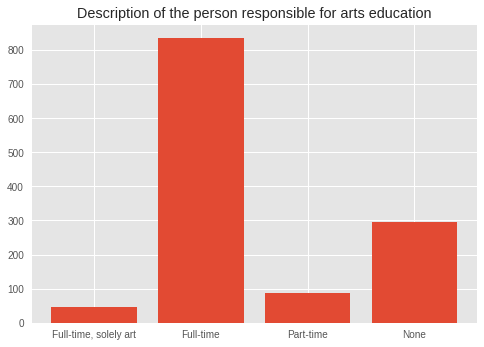

In [101]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(Q3, df_q3.sum())
plt.xticks(np.arange(4), ('Full-time, solely art', 'Full-time', 'Part-time', 'None'))
plt.title('Description of the person responsible for arts education')

Schools that did not select any option.

In [87]:
df_q3.shape[0] - df_q3.sum().sum()

2

### Q4 Arts Supervisor Certification in the Arts

In [88]:
df_q4 = df[['Q4_1', 'Q4_2']]
df_q4.head()

,Q4_1,Q4_2
0,1,0
1,0,1
2,0,0
3,0,1
4,1,0


This question only appeared if a school did not select option 4 in Q3. I am not sure whether this question was shown to schools that did not select an option in Q3.

In [93]:
df[['Q3_1', 'Q3_2', 'Q3_3']].sum().sum() - df_q4.sum().sum()

1

Text(0.5,1,'Is this person certified in an arts discipline?')

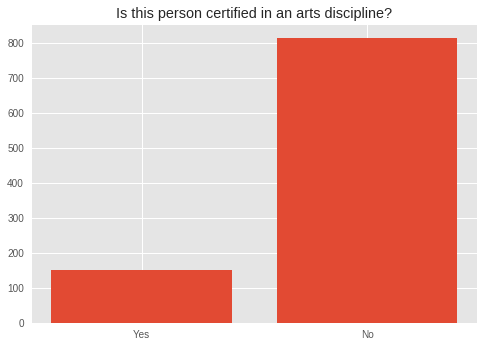

In [102]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(df_q4.columns, df_q4.sum())
plt.xticks(np.arange(2), ('Yes', 'No'))
plt.title('Is this person certified in an arts discipline?')

### Q5 Arts Supervisor Certification as Administrator

In [103]:
df_q5 = df[['Q5_1', 'Q5_2']]
df_q5.head()

,Q5_1,Q5_2
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1


Similarly, this question was only shown to those schools with an arts supervisor.

In [105]:
df[['Q3_1', 'Q3_2', 'Q3_3']].sum().sum() - df_q5.sum().sum()

1

Text(0.5,1,'Is this person certified as an administrator or supervisor?')

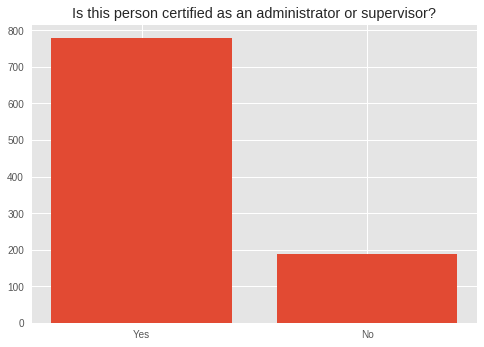

In [106]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(df_q5.columns, df_q5.sum())
plt.xticks(np.arange(2), ('Yes', 'No'))
plt.title('Is this person certified as an administrator or supervisor?')

How many arts supervisors are without certification in the arts or as an administrator?

In [113]:
df[df['Q4_2'] == 1][df['Q5_2'] == 1]['Q0_DBN'].count()

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


98

### Q6 Part-time certified teachers by discipline

In [114]:
Q6 = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4']
df_q6 = df[Q6]
df_q6.head()

,Q6_1,Q6_2,Q6_3,Q6_4
0,0,0,0,0
1,0,0,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,0,0


Here I am taking the number of schools as the whole, since we have switched from administrators to instructors.  
**Note** This question refers to part-time teachers, so I will have to find information on full-time teachers for full context. 

In [116]:
df_q6.shape[0] - df_q6.sum().sum()

456

Text(0.5,1,'Number of Part-Time Certified Arts Teachers')

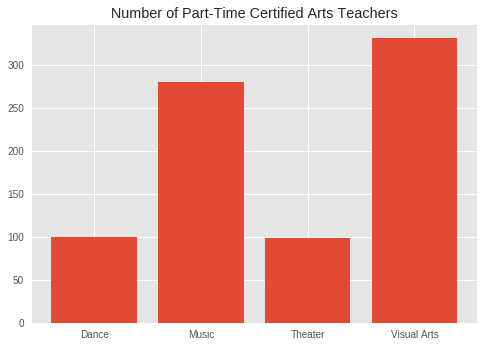

In [118]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(df_q6.columns, df_q6.sum())
plt.xticks(np.arange(4), ('Dance', 'Music', 'Theater', 'Visual Arts'))
plt.title('Number of Part-Time Certified Arts Teachers')

### Q7 Number of part-time teachers teaching arts 100%

**TODO** Compare composition of teachers for each discipline, ie percentage of part-time, full-time, other.

Questions are only shown if the corresponding response for Q6 was non-zero.

In [119]:
Q7 = ['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4']
df_q7 = df[Q7]
df_q7.head()

,Q7_1,Q7_2,Q7_3,Q7_4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,0.0
3,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN


Dance

In [135]:
df_pt_dance = df[df['Q6_1'] > 0][['Q0_DBN', 'Q7_1']]
df_pt_dance.describe()

,Q7_1
count,87.000000
mean,0.701149
std,0.748874
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


Text(0.5,1,'Number of Part-Time Certified Dance Teachers Teaching Art 100% of Their Schedule')

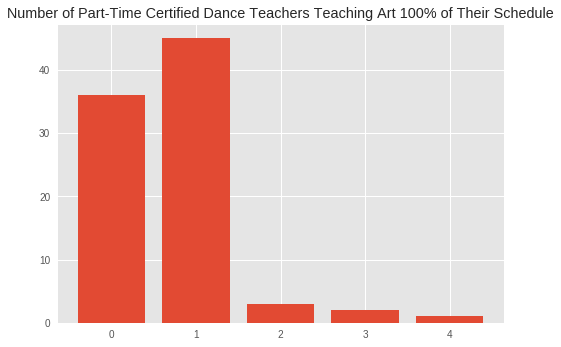

In [162]:
temp = df_pt_dance.groupby('Q7_1').count()
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(np.arange(5), temp['Q0_DBN'])
plt.title('Number of Part-Time Certified Dance Teachers Teaching Art 100% of Their Schedule')

Music

In [160]:
df_pt_music = df[df['Q6_2'] > 0][['Q0_DBN', 'Q7_2']]
df_pt_music.describe()

,Q7_2
count,215.000000
mean,0.879070
std,0.817038
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,7.000000


In [178]:
temp = df_pt_music.groupby('Q7_2').count()
new_index = pd.Index(np.arange(8))
temp = temp.reindex(new_index).fillna(0)

Text(0.5,1,'Number of Part-Time Certified Music Teachers Teaching Art 100% of Their Schedule')

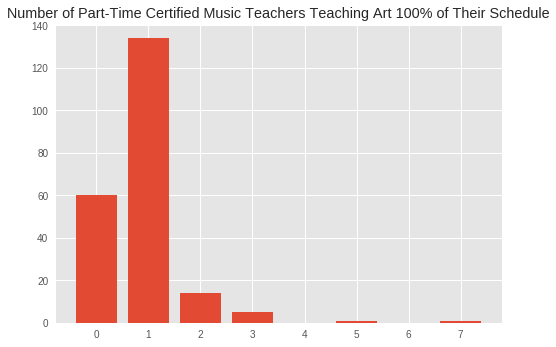

In [179]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(np.arange(8), temp['Q0_DBN'])
plt.title('Number of Part-Time Certified Music Teachers Teaching Art 100% of Their Schedule')

Theater

In [181]:
df_pt_thtr = df[df['Q6_3'] > 0][['Q0_DBN', 'Q7_3']]
df_pt_thtr.describe()

,Q7_3
count,86.000000
mean,0.686047
std,0.599247
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


Text(0.5,1,'Number of Part-Time Certified Theater Teachers Teaching Art 100% of Their Schedule')

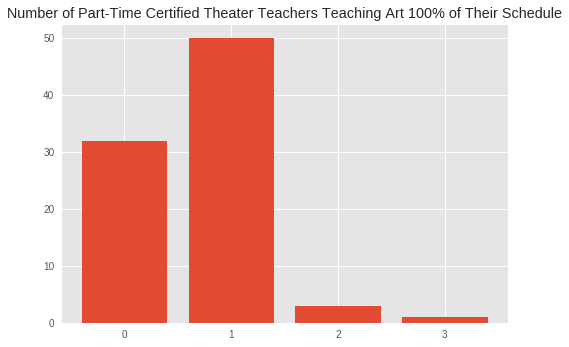

In [190]:
temp = df_pt_thtr.groupby('Q7_3').count()
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(np.arange(4), temp['Q0_DBN'])
plt.xticks(np.arange(4), (0, 1, 2, 3))
plt.title('Number of Part-Time Certified Theater Teachers Teaching Art 100% of Their Schedule')

Visual Arts

In [191]:
df_pt_visart = df[df['Q6_4'] > 0][['Q0_DBN', 'Q7_4']]
df_pt_visart.describe()

,Q7_4
count,264.000000
mean,0.765152
std,0.701545
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,5.000000


In [194]:
temp = df_pt_visart.groupby('Q7_4').count()
new_index = pd.Index(np.arange(6))
temp = temp.reindex(new_index).fillna(0)

Text(0.5,1,'Number of Part-Time Certified Visual Arts Teachers Teaching Art 100% of Their Schedule')

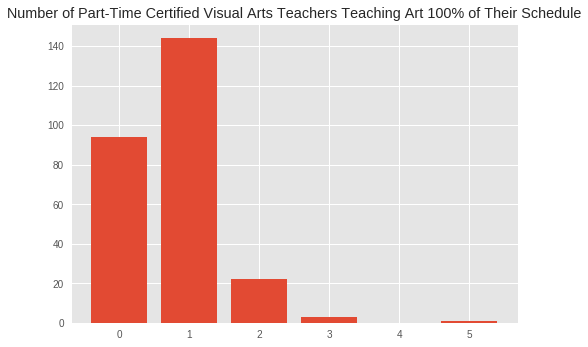

In [197]:
fig = plt.figure()
ax = fig.add_subplot()
plt.bar(np.arange(6), temp['Q0_DBN'])
plt.title('Number of Part-Time Certified Visual Arts Teachers Teaching Art 100% of Their Schedule')

### Q8 Arts Facilities

In [218]:
Q8 = ['Q0_DBN', 'Q8_R1_C1', 'Q8_R1_C2', 'Q8_R2_C1', 'Q8_R2_C2',
      'Q8_R3_C1', 'Q8_R3_C2', 'Q8_R4_C1', 'Q8_R4_C2', 'Q8_R5_C1', 'Q8_R5_C2']
df_q8 = df[Q8]
df_q8.head()

,Q0_DBN,Q8_R1_C1,Q8_R1_C2,Q8_R2_C1,Q8_R2_C2,Q8_R3_C1,Q8_R3_C2,Q8_R4_C1,Q8_R4_C2,Q8_R5_C1,Q8_R5_C2
0,01M015,0.0,1.0,1.0,1.0,1.0,4.0,1.0,11.0,1.0,11.0
1,01M019,0.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,1.0
2,01M020,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
3,01M034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,01M064,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


More schools failed to enter the number of multi-purpose rooms used in arts education (C2) than the number of rooms dedicated to art (C1).

In [219]:
df_q8.shape[0] - df_q8.count()

Q0_DBN        0
Q8_R1_C1     81
Q8_R1_C2    154
Q8_R2_C1     60
Q8_R2_C2    150
Q8_R3_C1     85
Q8_R3_C2    134
Q8_R4_C1     30
Q8_R4_C2    164
Q8_R5_C1     72
Q8_R5_C2    158
dtype: int64

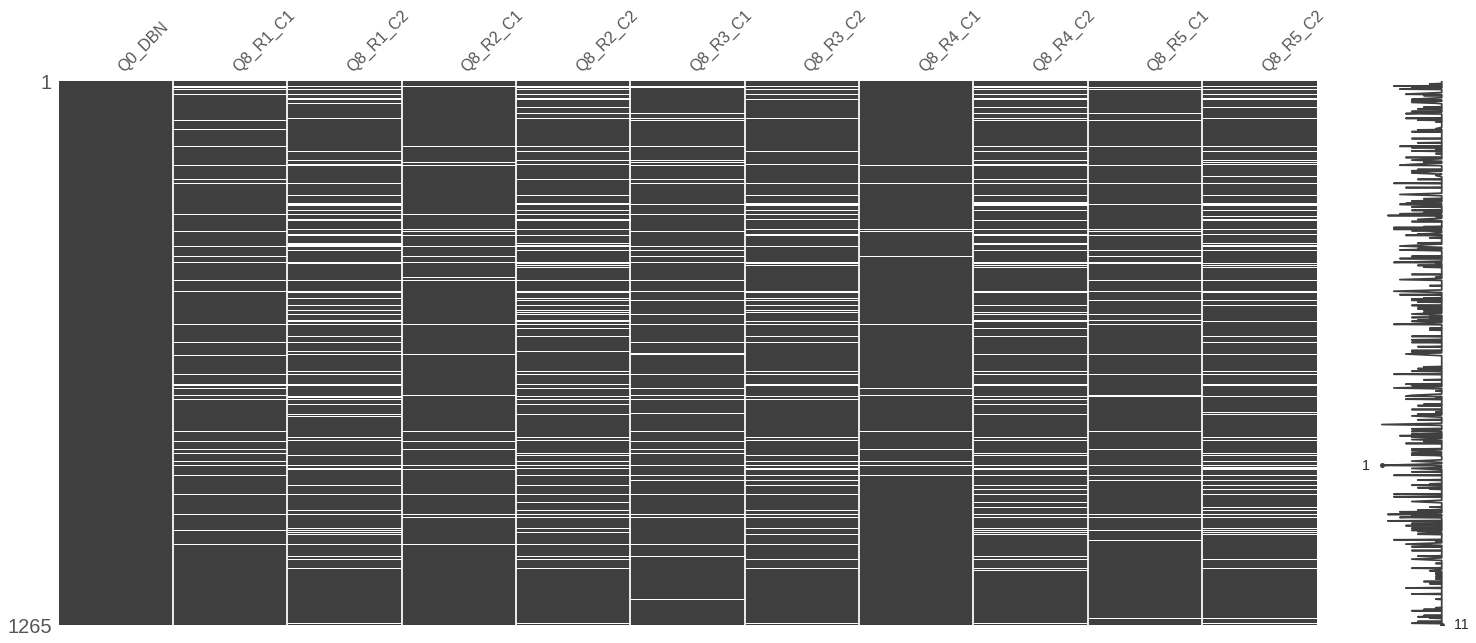

In [220]:
msno.matrix(df_q8)

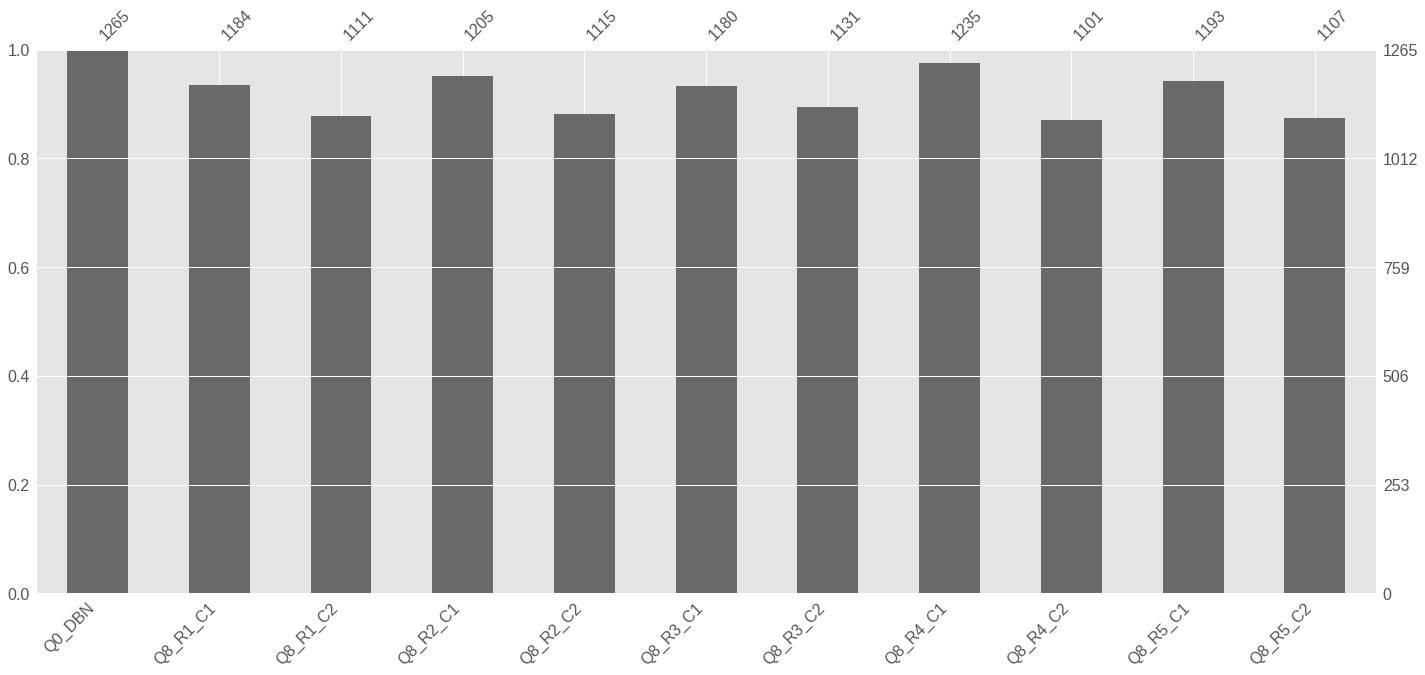

In [221]:
msno.bar(df_q8)

Responding to one C2 question is strongly correlated to responding to the others. C1 responses are less correlated.

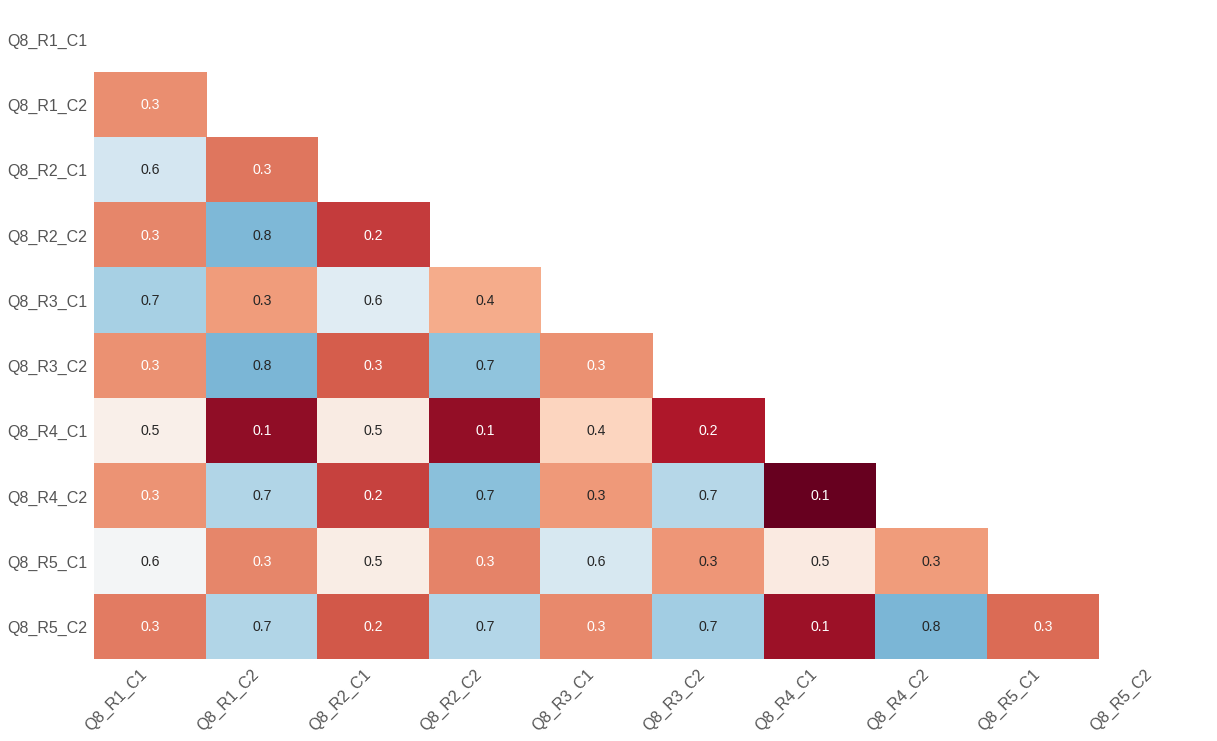

In [222]:
msno.heatmap(df_q8)

Rooms solely for the arts

In [253]:
df_rm_dance = df_q8.groupby('Q8_R1_C1')[['Q0_DBN']].count()
df_rm_music = df_q8.groupby('Q8_R2_C1')[['Q0_DBN']].count()
df_rm_thtr = df_q8.groupby('Q8_R3_C1')[['Q0_DBN']].count()
df_rm_visart = df_q8.groupby('Q8_R4_C1')[['Q0_DBN']].count()
df_rm_medart = df_q8.groupby('Q8_R5_C1')[['Q0_DBN']].count()
rms = [df_rm_dance, df_rm_music, df_rm_thtr, df_rm_visart, df_rm_medart]

In [254]:
max_rms = 0
for x in rms:
    max_rms = max(max_rms, x.index[-1])
max_rms

13.0

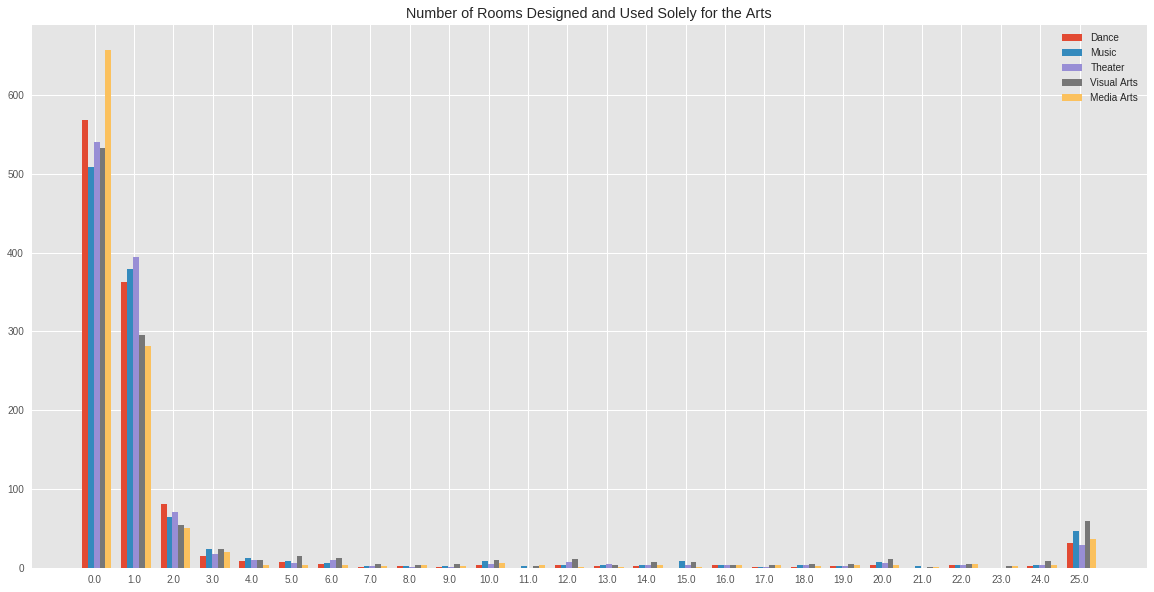

In [320]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
ind = np.arange(max_rms+1)
width = .15
for i,x in enumerate(rms):
    new_index = pd.Index(np.arange(max_rms+1))
    x = x.reindex(new_index).fillna(0)
    ax.bar(ind + i*width, x['Q0_DBN'], width)
ax.set_title('Number of Rooms Designed and Used Solely for the Arts')
ax.set_xticks(np.arange(max_rms+1)+.25)
ax.set_xticklabels(np.arange(max_rms+1))

_ = ax.legend(('Dance', 'Music', 'Theater', 'Visual Arts', 'Media Arts'))

Multi-purpose rooms

In [284]:
df_mp_dance = df_q8.groupby('Q8_R1_C2')[['Q0_DBN']].count()
df_mp_music = df_q8.groupby('Q8_R2_C2')[['Q0_DBN']].count()
df_mp_thtr = df_q8.groupby('Q8_R3_C2')[['Q0_DBN']].count()
df_mp_visart = df_q8.groupby('Q8_R4_C2')[['Q0_DBN']].count()
df_mp_medart = df_q8.groupby('Q8_R5_C2')[['Q0_DBN']].count()
rms = [df_mp_dance, df_mp_music, df_mp_thtr, df_mp_visart, df_mp_medart]

In [285]:
max_rms = 0
for x in rms:
    max_rms = max(max_rms, x.index[-1])
max_rms

25.0

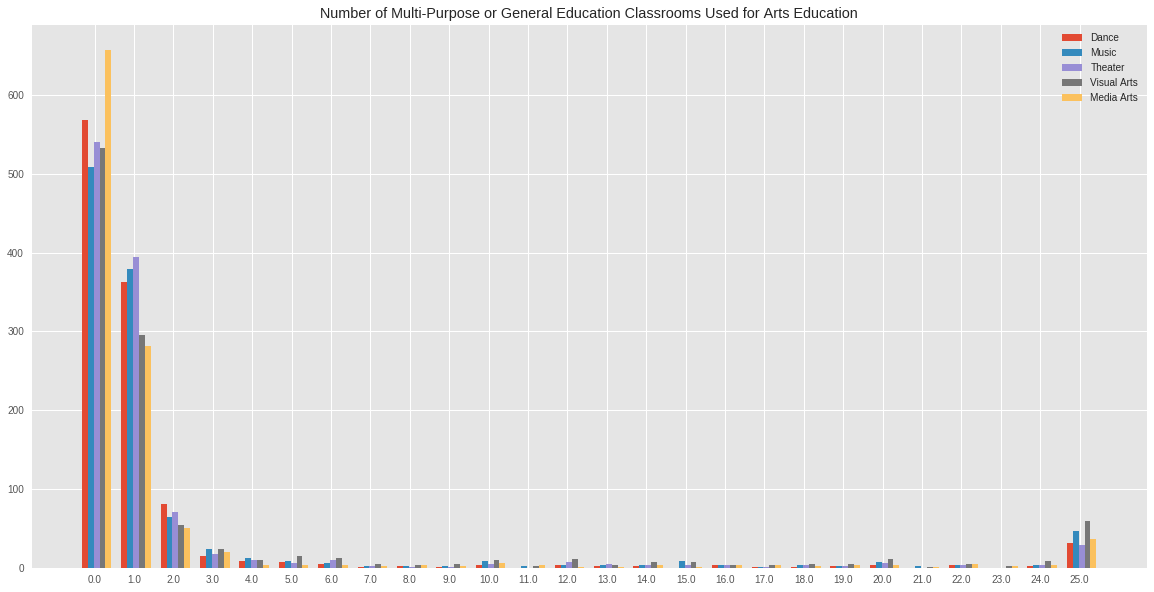

In [319]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
ind = np.arange(max_rms+1)
width = .15
for i,x in enumerate(rms):
    new_index = pd.Index(np.arange(max_rms+1))
    x = x.reindex(new_index).fillna(0)
    ax.bar(ind + i*width, x['Q0_DBN'], width)
ax.set_title('Number of Multi-Purpose or General Education Classrooms Used for Arts Education')
ax.set_xticks(np.arange(max_rms+1)+.25)
ax.set_xticklabels(np.arange(max_rms+1))

_ = ax.legend(('Dance', 'Music', 'Theater', 'Visual Arts', 'Media Arts'))

I wonder if 25 is a funnel point for schools estimating the number of rooms they devote to the arts.

**TODO** Plot proportions of schools devoting rooms to art  
Identify schools devoting many rooms to art

### Q9 Technology Tools

In [328]:
tools_list = ['Animation Software', 'Color Printers', 'Darkroom and Eqpmnt', 'Digital Drawing Tablets', 'Digital Still Cameras', 'Digital Video Cameras', 'Digital Video Editing Software', 'DVD Player/Recorder', 'Interactive Distance Exchange Labs', 'iPad/iPad mini/iPod', 'Laptop', 'Lighting Eqpmnt', 'MIDI Keyboards', 'Music Editing Software', 'Photo Editing Software', 'Scanners', 'Smartboard', 'Sound Eqpmnt', 'Still 35mm Film Cameras', 'Tablet, non-iPad', 'TV Studio', 'Video Projector']

In [323]:
tools = {'Q9_1': 'Animation Software',
         'Q9_2': 'Color Printers',
         'Q9_3': 'Darkroom and Eqpmnt',
         'Q9_4': 'Digital Drawing Tablets',
         'Q9_5': 'Digital Still Cameras',
         'Q9_6': 'Digital Video Cameras',
         'Q9_7': 'Digital Video Editing Software',
         'Q9_8': 'DVD Player/Recorder',
         'Q9_9': 'Interactive Distance Exchange Labs',
         'Q9_10': 'iPad/iPad mini/iPod',
         'Q9_11': 'Laptop',
         'Q9_12': 'Lighting Eqpmnt',
         'Q9_13': 'MIDI Keyboards',
         'Q9_14': 'Music Editing Software',
         'Q9_15': 'Photo Editing Software',
         'Q9_16': 'Scanners',
         'Q9_17': 'Smartboard',
         'Q9_18': 'Sound Eqpmnt',
         'Q9_19': 'Still 35mm Film Cameras',
         'Q9_20': 'Tablet, non-iPad',
         'Q9_21': 'TV Studio',
         'Q9_22': 'Video Projector'}

In [326]:
Q9 = [feature for feature in df.columns if feature.startswith('Q9')]
df_q9 = df[Q9]
df_q9.rename(index=str, columns=tools, inplace=True)
df_q9.head()

/home/eric/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Animation Software,Color Printers,Darkroom and Eqpmnt,Digital Drawing Tablets,Digital Still Cameras,Digital Video Cameras,Digital Video Editing Software,DVD Player/Recorder,Interactive Distance Exchange Labs,iPad/iPad mini/iPod,...,MIDI Keyboards,Music Editing Software,Photo Editing Software,Scanners,Smartboard,Sound Eqpmnt,Still 35mm Film Cameras,"Tablet, non-iPad",TV Studio,Video Projector
0,1,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


These were checkboxes so there is no opportunity for missing values.

In [339]:
temp = df_q9.sum().sort_values(ascending=True)

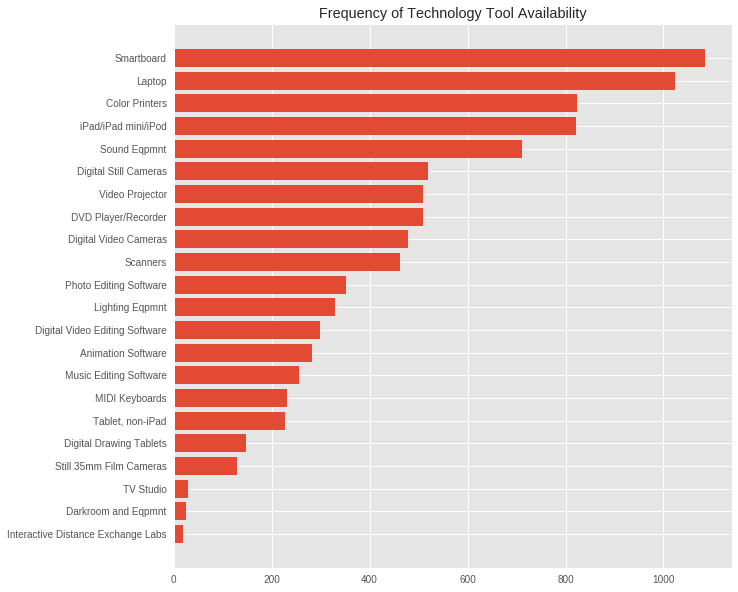

In [340]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots()
ax.barh(list(temp.index), temp)
ax.set_title('Frequency of Technology Tool Availability')
plt.show()

Speaking from experience, Smartboards are **not** an artistic tool so much as an oppressive remnant of the mid-2000s.  
I cannot take the frequency of laptops, iPads, cameras at face value, since the actual availability of these items to students is what matters. For example, if a school of 1000 has 10 laptops that is not worth very much.  
I would have hoped that software (photo editing, digital video editing, etc) would have been as available as laptops are.

### Q10 Arts Disciplines Offered

These questions were only shown to District 75 schools.

In [341]:
Q10 = ['Q10_R1_C1', 'Q10_R1_C2', 'Q10_R2_C1', 'Q10_R2_C2', 'Q10_R3_C1', 'Q10_R3_C2', 'Q10_R4_C1', 'Q10_R4_C2', 'Q10_R5_C1', 'Q10_R5_C2']
df_q10 = df[Q10]
df_q10.head()

,Q10_R1_C1,Q10_R1_C2,Q10_R2_C1,Q10_R2_C2,Q10_R3_C1,Q10_R3_C2,Q10_R4_C1,Q10_R4_C2,Q10_R5_C1,Q10_R5_C2
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


Checking that all district 75 schools responded to every question.

In [359]:
for i in range(5):
    print(df_q10[df_q10.columns[2*i:2*i+2]].sum().sum())

44
44
44
44
44


District 75 provides specialized support for students with educational challenges, such as: Autism, congnitive delays, emotional disturbances, sensory impairments.  
District 75 schools are located across NYC and sometimes co-located with other schools. They have lower student to faculty ratios, no more than 12:1, according to [NYC Schools](https://www.schools.nyc.gov/special-education/school-settings/district-75).

In [363]:
for i in range(5):
    print(df_q10[Q10[2*i:2*i+2]].sum())

Q10_R1_C1    29
Q10_R1_C2    15
dtype: int64
Q10_R2_C1    12
Q10_R2_C2    32
dtype: int64
Q10_R3_C1    38
Q10_R3_C2     6
dtype: int64
Q10_R4_C1    27
Q10_R4_C2    17
dtype: int64
Q10_R5_C1    44
Q10_R5_C2     0
dtype: int64


Perhaps including the "No" responses is superfluous.

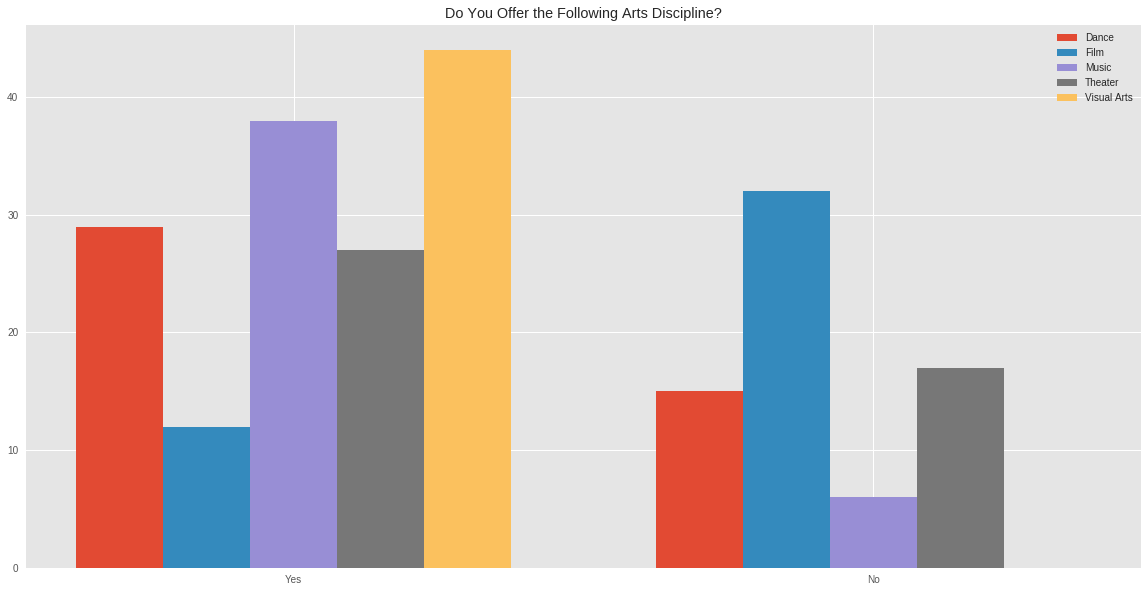

In [381]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
ind = np.arange(2)
width = .15
for i in range(5):
    temp = df_q10[Q10[2*i:2*i+2]].sum()
    ax.bar(ind + i*width, temp, width)

ax.set_title('Do You Offer the Following Arts Discipline?')
ax.set_xticks(np.arange(2)+.3)
ax.set_xticklabels(['Yes', 'No'])
_ = ax.legend(('Dance', 'Film', 'Music', 'Theater', 'Visual Arts'))

If "Visual Arts" refers to painting and drawing classes it is great that these are available to everyone, but I can imagine that this is the least resource-intensive discipline to offer.  
It is hard for me to not by cynical about the quality of any of these offerings, but particularly for district 75 schools.  
**TODO** How many of the schools in district 75 are colocated with schools that offer their students art resources? Is there some way to find this in the other questions?

### Q11 Pre-K Instruction

Shown to schools that offer Pre-K.  
Schools can select multiple options for each discipline.  
**TODO** Separate those schools with multiple instructor types from those with one or none. At the moment I am just taking a sum of all instructor types, and thus could be double-counting.

In [383]:
Q11 = [feature for feature in df.columns if feature.startswith('Q11')]
df_q11 = df[Q11]
df_q11.head()

,Q11_R1_C1,Q11_R1_C2,Q11_R1_C3,Q11_R1_C4,Q11_R2_C1,Q11_R2_C2,Q11_R2_C3,Q11_R2_C4,Q11_R3_C1,Q11_R3_C2,Q11_R3_C3,Q11_R3_C4,Q11_R4_C1,Q11_R4_C2,Q11_R4_C3,Q11_R4_C4
0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0
1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0
2,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0
3,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [388]:
disciplines = ['Dance', 'Music', 'Theater', 'Visual Arts']
for i in range(4):
    print('Number of schools selecting some option for {}: {}'.format(disciplines[i], df_q11[Q11[4*i:4*i+4]].sum().sum()))

Number of schools selecting some option for Dance: 662
Number of schools selecting some option for Music: 757
Number of schools selecting some option for Theater: 595
Number of schools selecting some option for Visual Arts: 800


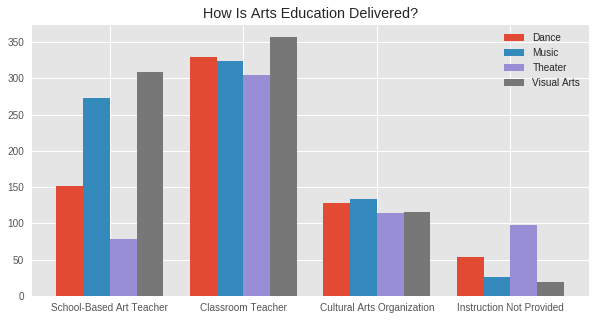

In [394]:
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ind = np.arange(4)
width = .2
for i in range(4):
    temp = df_q11[Q11[4*i:4*i+4]].sum()
    ax.bar(ind + i*width, temp, width)

ax.set_title('How Is Arts Education Delivered?')
ax.set_xticks(np.arange(4)+.3)
ax.set_xticklabels(['School-Based Art Teacher', 'Classroom Teacher', 'Cultural Arts Organization', 'Instruction Not Provided'])
_ = ax.legend(('Dance', 'Music', 'Theater', 'Visual Arts'))

Dance and theater instruction is not often provided by a school-based teacher (for pre-K students, at least).  
Could cultural organizations step in to close gaps in artistic opportunities? Should that be necessary?

### Q12 Arts Instructional Hours by Cultural Arts Organizations, Kindergarten

Shown to schools offering Kindergarten.  
Total number of instructional hours across all kindergarten classes, so this metric will be weighted in favor of those schools with many classes. This could have a strange effect, since schools with many students but poor funding do not necessarily have as many classes as schools with fewer students but the resources to have a lower teacher to student ratio.

In [395]:
Q12 = [feature for feature in df.columns if feature.startswith('Q12')]
df_q12 = df[Q12]
df_q12.head()

,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4
0,16.0,60.0,60.0,12.0
1,22.0,22.0,0.0,19.0
2,0.0,0.0,0.0,0.0
3,0.0,80.0,0.0,80.0
4,0.0,0.0,0.0,0.0


Missing value counts are equal for each discipline.  
There is some outlier in each discipline.

In [396]:
df_q12.describe()

,Q12_C1_R1,Q12_C1_R2,Q12_C1_R3,Q12_C1_R4
count,686.000000,686.000000,686.000000,686.000000
mean,38.750729,67.997085,57.467930,71.778426
std,648.017674,1292.623519,1292.058957,1293.813049
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,10.000000,10.000000,3.750000,10.000000
max,16929.000000,33840.000000,33840.000000,33840.000000


In [410]:
disc_map = {Q12[i]: disciplines[i] for i in range(4)}
df_q12.rename(index=str, columns=disc_map, inplace=True)
#Remove missing values
df_q12 = df_q12[df_q12['Dance'].notna()]

/home/eric/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Look at the outliers.  
There is only the one school with extreme values in every category, is this a case of incorrect data entry?

In [416]:
df_q12[df_q12['Dance'] > 10000]

,Dance,Music,Theater,Visual Arts
514,16929.0,33840.0,33840.0,33840.0


In [417]:
df[df['Q12_C1_R1'] > 10000]

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q45_6,Q45_7,Q45_8,Q45_9,Q45_10,Q46_1,Q47_1,Q48_1,Q48_2,Q48_3
514,12X691,Kathelyn,ovalles,Kovalles@schools.nyc.gov,0,0,1,0,0,0,...,1,1,1,0,0,At BLS we have one full-time drama teacher who...,NaN,Beverly Urquiza,Principal,burquiza@schools.nyc.gov


This is the Bronx Little School, it only has 307 students so we can chalk this up to a mistake.  
I will drop this row for now, but **TODO** check other values for other questions from this school.

In [419]:
df_q12 = df_q12[df_q12['Dance'] < 10000]

Theater instruction lags behind other disciplines. I would have guessed that this would have been the case for theater *and* dance, since I think of these disciplines as requiring more space and not lending themselves as well to many hours of school instruction.

Text(0.5,1,'Instructional Hours Provided by Cultural Arts Organizations')

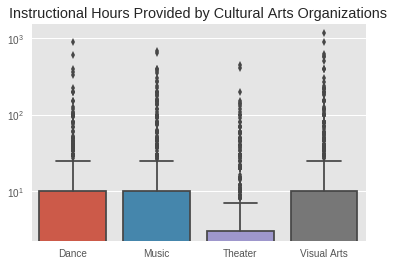

In [426]:
ax = sns.boxplot(data=df_q12)
ax.set_yscale('log')
ax.set_title('Instructional Hours Provided by Cultural Arts Organizations')

In [427]:
import joypy

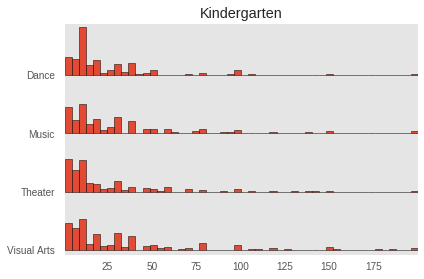

In [505]:
fig, ax = joypy.joyplot(df_q12, hist=True, x_range=(1, 200), overlap=0, bins=50, title='Kindergarten')

### Q13 Arts Instructional Hours by Cultural Organizations, First Grade

This question provides five columns for each discipline, but they are all titled "Official Class Register". I would guess that schools are allowed to separate by cultural organization? This would not be helpful for my purposes.

In [444]:
Q13 = [feature for feature in df.columns if feature.startswith('Q13')]
len(Q13)

60

There are 20 spaces in the input format pdf.

In [446]:
Q13

['Q13_C1_R1',
 'Q13_C1_R2',
 'Q13_C1_R3',
 'Q13_C1_R4',
 'Q13_C2_R1',
 'Q13_C2_R2',
 'Q13_C2_R3',
 'Q13_C2_R4',
 'Q13_C3_R1',
 'Q13_C3_R2',
 'Q13_C3_R3',
 'Q13_C3_R4',
 'Q13_C4_R1',
 'Q13_C4_R2',
 'Q13_C4_R3',
 'Q13_C4_R4',
 'Q13_C5_R1',
 'Q13_C5_R2',
 'Q13_C5_R3',
 'Q13_C5_R4',
 'Q13_C6_R1',
 'Q13_C6_R2',
 'Q13_C6_R3',
 'Q13_C6_R4',
 'Q13_C7_R1',
 'Q13_C7_R2',
 'Q13_C7_R3',
 'Q13_C7_R4',
 'Q13_C8_R1',
 'Q13_C8_R2',
 'Q13_C8_R3',
 'Q13_C8_R4',
 'Q13_C9_R1',
 'Q13_C9_R2',
 'Q13_C9_R3',
 'Q13_C9_R4',
 'Q13_C10_R1',
 'Q13_C10_R2',
 'Q13_C10_R3',
 'Q13_C10_R4',
 'Q13_C11_R1',
 'Q13_C11_R2',
 'Q13_C11_R3',
 'Q13_C11_R4',
 'Q13_C12_R1',
 'Q13_C12_R2',
 'Q13_C12_R3',
 'Q13_C12_R4',
 'Q13_C13_R1',
 'Q13_C13_R2',
 'Q13_C13_R3',
 'Q13_C13_R4',
 'Q13_C14_R1',
 'Q13_C14_R2',
 'Q13_C14_R3',
 'Q13_C14_R4',
 'Q13_C15_R1',
 'Q13_C15_R2',
 'Q13_C15_R3',
 'Q13_C15_R4']

In [445]:
df_q13 = df[Q13]
df_q13.head()

,Q13_C1_R1,Q13_C1_R2,Q13_C1_R3,Q13_C1_R4,Q13_C2_R1,Q13_C2_R2,Q13_C2_R3,Q13_C2_R4,Q13_C3_R1,Q13_C3_R2,...,Q13_C13_R3,Q13_C13_R4,Q13_C14_R1,Q13_C14_R2,Q13_C14_R3,Q13_C14_R4,Q13_C15_R1,Q13_C15_R2,Q13_C15_R3,Q13_C15_R4
0,0.0,30.0,30.0,6.0,0.0,30.0,30.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,30.0,0.0,30.0,0.0,30.0,0.0,30.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
for feature in Q13:
    print(feature, df_q13[df_q13[feature].notna()].shape[0] / df_q13.shape[0])

Q13_C1_R1 0.5146245059288538
Q13_C1_R2 0.5146245059288538
Q13_C1_R3 0.5146245059288538
Q13_C1_R4 0.5146245059288538
Q13_C2_R1 0.5027667984189723
Q13_C2_R2 0.5027667984189723
Q13_C2_R3 0.5027667984189723
Q13_C2_R4 0.5027667984189723
Q13_C3_R1 0.43952569169960476
Q13_C3_R2 0.43952569169960476
Q13_C3_R3 0.43952569169960476
Q13_C3_R4 0.43952569169960476
Q13_C4_R1 0.3367588932806324
Q13_C4_R2 0.3367588932806324
Q13_C4_R3 0.3367588932806324
Q13_C4_R4 0.3367588932806324
Q13_C5_R1 0.2158102766798419
Q13_C5_R2 0.2158102766798419
Q13_C5_R3 0.2158102766798419
Q13_C5_R4 0.2158102766798419
Q13_C6_R1 0.13201581027667983
Q13_C6_R2 0.13201581027667983
Q13_C6_R3 0.13201581027667983
Q13_C6_R4 0.13201581027667983
Q13_C7_R1 0.07114624505928854
Q13_C7_R2 0.07114624505928854
Q13_C7_R3 0.07114624505928854
Q13_C7_R4 0.07114624505928854
Q13_C8_R1 0.03162055335968379
Q13_C8_R2 0.03162055335968379
Q13_C8_R3 0.03162055335968379
Q13_C8_R4 0.03162055335968379
Q13_C9_R1 0.019762845849802372
Q13_C9_R2 0.0197628458498

From the increasing number of missing values by column I feel confident that schools are dividing the total hours provided by some feature I do not have access to. I will just sum up the values for each discipline.

In [452]:
R1 = [feature for feature in Q13 if feature.endswith('R1')]
R2 = [feature for feature in Q13 if feature.endswith('R2')]
R3 = [feature for feature in Q13 if feature.endswith('R3')]
R4 = [feature for feature in Q13 if feature.endswith('R4')]

In [457]:
df['Q13_R1'] = df[R1].sum(axis=1) #Dance
df['Q13_R2'] = df[R2].sum(axis=1) #Music
df['Q13_R3'] = df[R3].sum(axis=1) #Theater
df['Q13_R4'] = df[R4].sum(axis=1) #Visual Arts

In [460]:
Q13_agg = [feature for feature in df.columns if feature.startswith('Q13_R')]
df_q13 = df[Q13_agg]
df_q13.head()

,Q13_R1,Q13_R2,Q13_R3,Q13_R4
0,0.0,60.0,60.0,12.0
1,22.0,22.0,0.0,40.0
2,0.0,150.0,0.0,150.0
3,0.0,4.0,0.0,4.0
4,16.0,0.0,0.0,0.0


In [464]:
df_q13.describe()

,Q13_R1,Q13_R2,Q13_R3,Q13_R4
count,1265.000000,1265.000000,1265.000000,1265.000000
mean,31.742292,49.624506,26.128063,56.781028
std,483.646511,955.796883,480.202988,984.403551
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,16920.000000,33840.000000,16920.000000,33840.000000


Again we see some outliers and they turn out to originate from the same school as before. I am confident that there is a data entry error.

In [465]:
df_q13[df_q13['Q13_R1'] > 10000]

,Q13_R1,Q13_R2,Q13_R3,Q13_R4
514,16920.0,33840.0,16920.0,33840.0


In [466]:
df[df_q13['Q13_R1'] > 10000]

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q45_10,Q46_1,Q47_1,Q48_1,Q48_2,Q48_3,Q13_R1,Q13_R2,Q13_R3,Q13_R4
514,12X691,Kathelyn,ovalles,Kovalles@schools.nyc.gov,0,0,1,0,0,0,...,0,At BLS we have one full-time drama teacher who...,NaN,Beverly Urquiza,Principal,burquiza@schools.nyc.gov,16920.0,33840.0,16920.0,33840.0


In [474]:
df_q13 = df_q13[df_q13['Q13_R1'] < 10000]
disc_map = {df_q13.columns[i]: disciplines[i] for i in range(4)}
df_q13.rename(index=str, columns=disc_map, inplace=True)

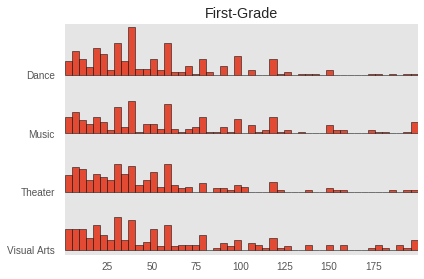

In [506]:
fig, ax = joypy.joyplot(df_q13, hist=True, x_range=(1, 200), overlap=0, bins=50, title='First-Grade')

The 75th percentile for first-graders is zero for all disciplines, while they were nonzero for kindergarten. Perhaps there is an increasing emphasis placed on tests, at the expense of arts education.

### Q14 Arts Instructional Hours by Cultural Organizations, Second Grade

In [476]:
Q14 = [feature for feature in df.columns if feature.startswith('Q14')]
len(Q14)

56

There are 20 spaces in the input format pdf.

In [479]:
df_q14 = df[Q14]

In [480]:
for feature in Q14:
    print(feature, df_q14[df_q14[feature].notna()].shape[0] / df_q14.shape[0])

Q14_C1_R1 0.5122529644268775
Q14_C1_R2 0.5122529644268775
Q14_C1_R3 0.5122529644268775
Q14_C1_R4 0.5122529644268775
Q14_C2_R1 0.5027667984189723
Q14_C2_R2 0.5027667984189723
Q14_C2_R3 0.5027667984189723
Q14_C2_R4 0.5027667984189723
Q14_C3_R1 0.42924901185770753
Q14_C3_R2 0.42924901185770753
Q14_C3_R3 0.42924901185770753
Q14_C3_R4 0.42924901185770753
Q14_C4_R1 0.33280632411067196
Q14_C4_R2 0.33280632411067196
Q14_C4_R3 0.33280632411067196
Q14_C4_R4 0.33280632411067196
Q14_C5_R1 0.233201581027668
Q14_C5_R2 0.233201581027668
Q14_C5_R3 0.233201581027668
Q14_C5_R4 0.233201581027668
Q14_C6_R1 0.1383399209486166
Q14_C6_R2 0.1383399209486166
Q14_C6_R3 0.1383399209486166
Q14_C6_R4 0.1383399209486166
Q14_C7_R1 0.06561264822134387
Q14_C7_R2 0.06561264822134387
Q14_C7_R3 0.06561264822134387
Q14_C7_R4 0.06561264822134387
Q14_C8_R1 0.03557312252964427
Q14_C8_R2 0.03557312252964427
Q14_C8_R3 0.03557312252964427
Q14_C8_R4 0.03557312252964427
Q14_C9_R1 0.017391304347826087
Q14_C9_R2 0.01739130434782608

In [481]:
R1 = [feature for feature in Q14 if feature.endswith('R1')]
R2 = [feature for feature in Q14 if feature.endswith('R2')]
R3 = [feature for feature in Q14 if feature.endswith('R3')]
R4 = [feature for feature in Q14 if feature.endswith('R4')]

In [482]:
df['Q14_R1'] = df[R1].sum(axis=1) #Dance
df['Q14_R2'] = df[R2].sum(axis=1) #Music
df['Q14_R3'] = df[R3].sum(axis=1) #Theater
df['Q14_R4'] = df[R4].sum(axis=1) #Visual Arts

In [483]:
Q14_agg = [feature for feature in df.columns if feature.startswith('Q14_R')]
df_q14 = df[Q14_agg]
df_q14.head()

,Q14_R1,Q14_R2,Q14_R3,Q14_R4
0,0.0,60.0,60.0,0.0
1,22.0,22.0,0.0,30.0
2,90.0,90.0,0.0,0.0
3,0.0,4.0,0.0,4.0
4,0.0,0.0,0.0,0.0


In [484]:
df_q14.describe()

,Q14_R1,Q14_R2,Q14_R3,Q14_R4
count,1265.000000,1265.000000,1265.000000,1265.000000
mean,44.021344,69.396838,41.991304,67.017391
std,641.365941,1059.511358,641.943209,1052.522998
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,16920.000000,33840.000000,16920.000000,33840.000000


Again we see some outliers and they turn out to originate from the same school as before **plus** another school with the same large entry for every discipline. I am confident that there is a data entry error.

In [485]:
df_q14[df_q14['Q14_R1'] > 10000]

,Q14_R1,Q14_R2,Q14_R3,Q14_R4
514,16920.0,33840.0,16920.0,33840.0
973,15000.0,15000.0,15000.0,15000.0


In [486]:
df[df_q14['Q14_R1'] > 10000]

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q48_2,Q48_3,Q13_R1,Q13_R2,Q13_R3,Q13_R4,Q14_R1,Q14_R2,Q14_R3,Q14_R4
514,12X691,Kathelyn,ovalles,Kovalles@schools.nyc.gov,0,0,1,0,0,0,...,Principal,burquiza@schools.nyc.gov,16920.0,33840.0,16920.0,33840.0,16920.0,33840.0,16920.0,33840.0
973,27Q056,Deana,Rinaldi,drinaldi@SCHOOLS.NYC.GOV,0,0,1,0,0,0,...,Assistant Principal,drinaldi@schools.nyc.gov,0.0,0.0,0.0,0.0,15000.0,15000.0,15000.0,15000.0


In [488]:
df_q14 = df_q14[df_q14['Q14_R1'] < 10000]
disc_map = {df_q14.columns[i]: disciplines[i] for i in range(4)}
df_q14.rename(index=str, columns=disc_map, inplace=True)

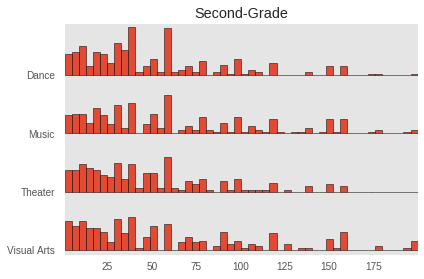

In [507]:
fig, ax = joypy.joyplot(df_q14, hist=True, x_range=(1, 200), overlap=0, bins=50, title='Second-Grade')

**TODO** Compare hours by school and by grade, ie do schools tend devote more hours to younger students or older?

### Q15 Arts Instructional Hours by Cultural Organizations, Third Grade

In [490]:
Q15 = [feature for feature in df.columns if feature.startswith('Q15')]
len(Q15)

56

There are 20 spaces in the input format pdf.

In [491]:
df_q15 = df[Q15]
for feature in Q15:
    print(feature, df_q15[df_q15[feature].notna()].shape[0] / df_q15.shape[0])

Q15_C1_R1 0.5059288537549407
Q15_C1_R2 0.5059288537549407
Q15_C1_R3 0.5059288537549407
Q15_C1_R4 0.5059288537549407
Q15_C2_R1 0.4956521739130435
Q15_C2_R2 0.4956521739130435
Q15_C2_R3 0.4956521739130435
Q15_C2_R4 0.4956521739130435
Q15_C3_R1 0.4308300395256917
Q15_C3_R2 0.4308300395256917
Q15_C3_R3 0.4308300395256917
Q15_C3_R4 0.4308300395256917
Q15_C4_R1 0.32727272727272727
Q15_C4_R2 0.32727272727272727
Q15_C4_R3 0.32727272727272727
Q15_C4_R4 0.32727272727272727
Q15_C5_R1 0.2158102766798419
Q15_C5_R2 0.2158102766798419
Q15_C5_R3 0.2158102766798419
Q15_C5_R4 0.2158102766798419
Q15_C6_R1 0.1391304347826087
Q15_C6_R2 0.1391304347826087
Q15_C6_R3 0.1391304347826087
Q15_C6_R4 0.1391304347826087
Q15_C7_R1 0.08142292490118577
Q15_C7_R2 0.08142292490118577
Q15_C7_R3 0.08142292490118577
Q15_C7_R4 0.08142292490118577
Q15_C8_R1 0.045059288537549404
Q15_C8_R2 0.045059288537549404
Q15_C8_R3 0.045059288537549404
Q15_C8_R4 0.045059288537549404
Q15_C9_R1 0.02450592885375494
Q15_C9_R2 0.02450592885375

In [492]:
R1 = [feature for feature in Q15 if feature.endswith('R1')]
R2 = [feature for feature in Q15 if feature.endswith('R2')]
R3 = [feature for feature in Q15 if feature.endswith('R3')]
R4 = [feature for feature in Q15 if feature.endswith('R4')]

In [493]:
df['Q15_R1'] = df[R1].sum(axis=1) #Dance
df['Q15_R2'] = df[R2].sum(axis=1) #Music
df['Q15_R3'] = df[R3].sum(axis=1) #Theater
df['Q15_R4'] = df[R4].sum(axis=1) #Visual Arts

In [494]:
Q15_agg = [feature for feature in df.columns if feature.startswith('Q15_R')]
df_q15 = df[Q15_agg]
df_q15.head()

,Q15_R1,Q15_R2,Q15_R3,Q15_R4
0,0.0,60.0,20.0,0.0
1,208.0,48.0,0.0,40.0
2,60.0,60.0,0.0,0.0
3,0.0,4.0,0.0,4.0
4,0.0,0.0,0.0,30.0


In [495]:
df_q15.describe()

,Q15_R1,Q15_R2,Q15_R3,Q15_R4
count,1265.000000,1265.000000,1265.000000,1265.000000
mean,42.711462,64.600000,42.800000,65.456126
std,618.294044,1021.802748,627.019478,1026.057429
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,18120.000000,33840.000000,18120.000000,33840.000000


Again we see some outliers and they turn out to originate from the same school as before **plus** another school with the same large entry for every discipline. I am confident that there is a data entry error.

In [496]:
df_q15[df_q15['Q15_R1'] > 10000]

,Q15_R1,Q15_R2,Q15_R3,Q15_R4
514,18120.0,33840.0,18120.0,33840.0
973,12000.0,12000.0,12000.0,12000.0


In [497]:
df[df_q15['Q15_R1'] > 10000]

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q13_R3,Q13_R4,Q14_R1,Q14_R2,Q14_R3,Q14_R4,Q15_R1,Q15_R2,Q15_R3,Q15_R4
514,12X691,Kathelyn,ovalles,Kovalles@schools.nyc.gov,0,0,1,0,0,0,...,16920.0,33840.0,16920.0,33840.0,16920.0,33840.0,18120.0,33840.0,18120.0,33840.0
973,27Q056,Deana,Rinaldi,drinaldi@SCHOOLS.NYC.GOV,0,0,1,0,0,0,...,0.0,0.0,15000.0,15000.0,15000.0,15000.0,12000.0,12000.0,12000.0,12000.0


In [498]:
df_q15 = df_q15[df_q15['Q15_R1'] < 10000]
disc_map = {df_q15.columns[i]: disciplines[i] for i in range(4)}
df_q15.rename(index=str, columns=disc_map, inplace=True)

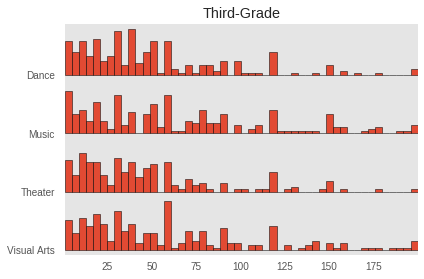

In [508]:
fig, ax = joypy.joyplot(df_q15, hist=True, x_range=(1, 200), overlap=0, bins=50, title='Third-Grade')

### Q16 Arts Instructional Hours by Cultural Organizations, Fourth Grade

In [509]:
Q16 = [feature for feature in df.columns if feature.startswith('Q16')]
len(Q16)

56

There are 20 spaces in the input format pdf.

In [511]:
R1 = [feature for feature in Q16 if feature.endswith('R1')]
R2 = [feature for feature in Q16 if feature.endswith('R2')]
R3 = [feature for feature in Q16 if feature.endswith('R3')]
R4 = [feature for feature in Q16 if feature.endswith('R4')]

In [512]:
df['Q16_R1'] = df[R1].sum(axis=1) #Dance
df['Q16_R2'] = df[R2].sum(axis=1) #Music
df['Q16_R3'] = df[R3].sum(axis=1) #Theater
df['Q16_R4'] = df[R4].sum(axis=1) #Visual Arts

In [513]:
Q16_agg = [feature for feature in df.columns if feature.startswith('Q16_R')]
df_q16 = df[Q16_agg]
df_q16.head()

,Q16_R1,Q16_R2,Q16_R3,Q16_R4
0,0.0,60.0,20.0,0.0
1,208.0,48.0,0.0,40.0
2,120.0,120.0,0.0,0.0
3,0.0,4.0,0.0,4.0
4,15.0,0.0,0.0,0.0


In [514]:
df_q16.describe()

,Q16_R1,Q16_R2,Q16_R3,Q16_R4
count,1265.000000,1265.000000,1265.000000,1265.000000
mean,76.555731,76.879051,54.571542,60.833202
std,1572.517781,1574.129461,1016.339224,664.424497
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,54530.000000,54530.000000,33840.000000,16930.000000


Again we see some outliers and they turn out to originate from the same school as before **plus** another school with the same large entry for every discipline. I am confident that there is a data entry error.

In [515]:
df_q16[df_q16['Q16_R1'] > 10000]

,Q16_R1,Q16_R2,Q16_R3,Q16_R4
514,54530.0,54530.0,33840.0,16930.0
973,12000.0,12000.0,12000.0,12000.0


In [516]:
df[df_q16['Q16_R1'] > 10000]

,Q0_DBN,Q1_1,Q1_2,Q1_3,Q2_1,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,...,Q14_R3,Q14_R4,Q15_R1,Q15_R2,Q15_R3,Q15_R4,Q16_R1,Q16_R2,Q16_R3,Q16_R4
514,12X691,Kathelyn,ovalles,Kovalles@schools.nyc.gov,0,0,1,0,0,0,...,16920.0,33840.0,18120.0,33840.0,18120.0,33840.0,54530.0,54530.0,33840.0,16930.0
973,27Q056,Deana,Rinaldi,drinaldi@SCHOOLS.NYC.GOV,0,0,1,0,0,0,...,15000.0,15000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0


In [517]:
df_q16 = df_q16[df_q16['Q16_R1'] < 10000]
disc_map = {df_q16.columns[i]: disciplines[i] for i in range(4)}
df_q16.rename(index=str, columns=disc_map, inplace=True)

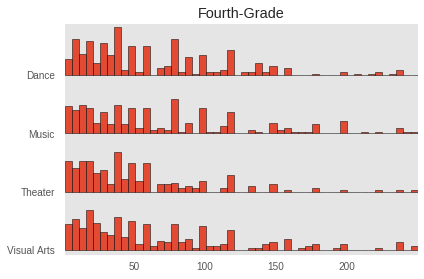

In [519]:
fig, ax = joypy.joyplot(df_q16, hist=True, x_range=(1, 250), overlap=0, bins=50, title='Fourth-Grade')

**TODO** Mean hours of instruction are increasing by grade?